In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter

In [6]:
cwd = os.getcwd()

In [12]:
df= pd.read_csv(cwd+'/2_Avg_GMV.csv')
df.reset_index(drop=True, inplace=True)


In [13]:
df.head()

,seller_id,num_of_linked_acct,avg_GMV
0,1022163208,1,17.93
1,49464703,1,37.63
2,12345941,1,1.00
3,6215366,1,11.98
4,3359755,1,1.00


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


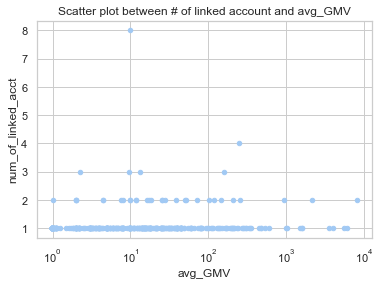

In [75]:
## create scatter plot 
fig = df.plot.scatter(x='avg_GMV', y='num_of_linked_acct', logx=True ,title= "Scatter plot between # of linked account and avg_GMV").get_figure();
fig.savefig('test.png',dpi=fig.dpi)


In [11]:
# import seaborn as sns
# f, ax = plt.subplots(figsize=(7, 6))
# ax.set_yscale("log")
# # sns.set(style="ticks", palette="pastel")
# # Draw a nested boxplot to show bills by day and time
# sns.boxplot(x="num_of_linked_acct", y="avg_GMV",data=df)
# # sns.despine(offset=10, trim=True)
# ax.yaxis.grid(True)
# # ax.set(ylabel="")
# sns.despine(trim=True, left=True)

In [39]:
# import seaborn as sns

# sns.set_style("whitegrid")
# tips = sns.load_dataset("tips")
# box_plot = sns.boxplot(x="day",y="total_bill",data=tips)

# medians = tips.groupby(['day'])['total_bill'].median()
# vertical_offset = tips['total_bill'].median() * 0.05 # offset from median for display

# for xtick in box_plot.get_xticks():
#     box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
#             horizontalalignment='center',size='x-small',color='w',weight='semibold')

In [44]:
medians.round(2)

0     10.74
1     21.77
2     11.35
3    248.45
4      9.74
Name: avg_GMV, dtype: float64

In [164]:
df.loc[df.num_of_linked_acct==k]['avg_GMV']

0       17.93
1       37.63
2        1.00
3       11.98
4        1.00
        ...  
364     13.99
365     59.74
366     18.04
367    167.97
368     21.10
Name: avg_GMV, Length: 333, dtype: float64

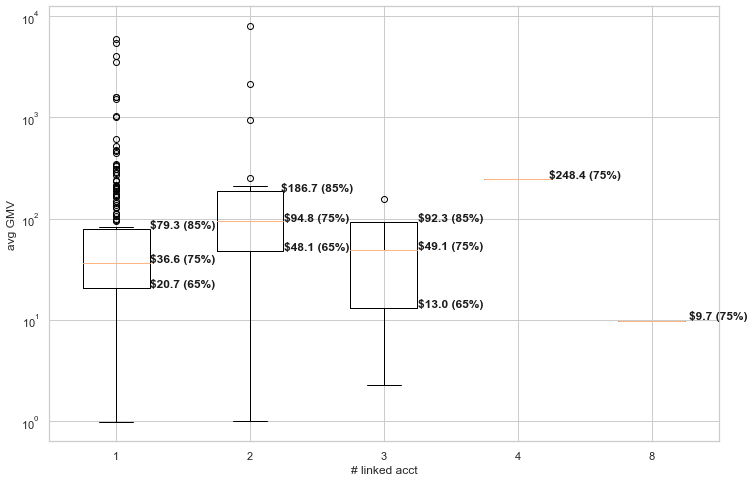

In [209]:
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data to visualise
stats={}
for k in df.num_of_linked_acct.unique():
    data=df.loc[df.num_of_linked_acct==k]['avg_GMV']
    stats[k] = cbook.boxplot_stats(data, labels=str(k))[0]
    stats[k]['q1'], stats[k]['med'], stats[k]['q3'] = np.percentile(data, [65, 75, 85])

# stats = {}
# # Compute the boxplot stats (as in the default matplotlib implementation)
# stats['A'] = cbook.boxplot_stats(data, labels='A')[0]
# stats['B'] = cbook.boxplot_stats(data, labels='B')[0]
# stats['C'] = cbook.boxplot_stats(data, labels='C')[0]

# # For box A compute the 1st and 99th percentiles
# stats['A']['q1'], stats['A']['q3'] = np.percentile(data, [1, 99])
# # For box B compute the 10th and 90th percentiles
# stats['B']['q1'], stats['B']['q3'] = np.percentile(data, [10, 90])
# # For box C compute the 25th and 75th percentiles (matplotlib default)
# stats['C']['q1'], stats['C']['q3'] = np.percentile(data, [25, 75])

fig, ax = plt.subplots(figsize=(12,8))
ax.set_yscale("log")
# Plot boxplots from our computed statistics

medians = df[['num_of_linked_acct','avg_GMV']].groupby(['num_of_linked_acct'])['avg_GMV'].quantile(0.75).round(1)
medians.reset_index(drop=True,inplace=True)
vertical_offset = df['avg_GMV'].quantile(0.75) * 0.01 # offset from median for display

fst_quantile = df[['num_of_linked_acct','avg_GMV']].groupby(['num_of_linked_acct'])['avg_GMV'].quantile(0.65).round(1)
fst_quantile.reset_index(drop=True,inplace=True)
fst_offset = df['avg_GMV'].quantile(0.65) * 0.01 # offset from median for display

snd_quantile = df[['num_of_linked_acct','avg_GMV']].groupby(['num_of_linked_acct'])['avg_GMV'].quantile(0.85).round(1)
snd_quantile.reset_index(drop=True,inplace=True)
snd_offset = df['avg_GMV'].quantile(0.85) * 0.01 # offset from median for display

ax.bxp([stats[i] for i in np.sort(list(stats.keys()))], positions=range(len(stats.keys())))

shift=0.5
size=12

for xtick in ax.get_xticks()[:3]:
    ax.text(xtick+shift, medians[xtick] + vertical_offset, '$'+str(medians[xtick])+ str(' (75%)'), 
            horizontalalignment='center',size=size,color='k',weight='semibold')
    ax.text(xtick+shift, fst_quantile[xtick] + fst_offset, '$'+str(fst_quantile[xtick])+ str(' (65%)'), 
            horizontalalignment='center',size=size,color='k',weight='semibold')
    ax.text(xtick+shift, snd_quantile[xtick] + snd_offset, '$'+str(snd_quantile[xtick])+ str(' (85%)'), 
            horizontalalignment='center',size=size,color='k',weight='semibold')
for xtick in ax.get_xticks()[3:]:
    ax.text(xtick+shift, medians[xtick] + vertical_offset, '$'+str(medians[xtick])+ str(' (75%)'), 
            horizontalalignment='center',size=size,color='k',weight='semibold')
    
ax.set_ylabel('avg GMV')   
ax.set_xlabel('# linked acct')  
fig.savefig('boxplot.png', dpi=fig.dpi)

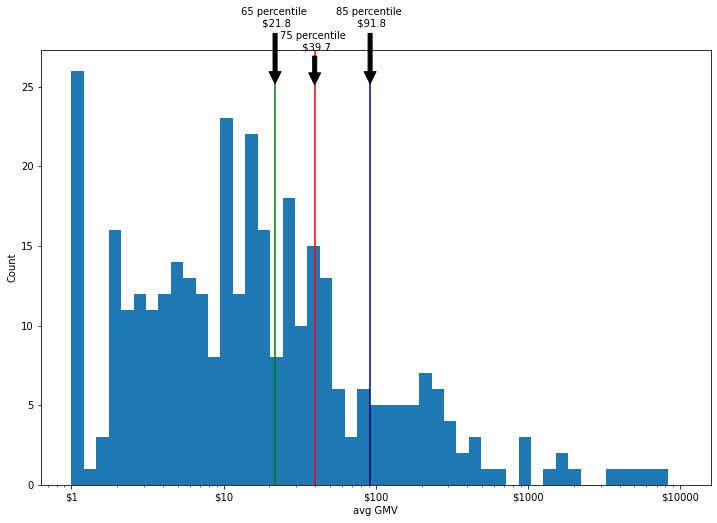

In [20]:
# df.avg_GMV.hist(log=True,bins=50)
from matplotlib.ticker import MultipleLocator,AutoMinorLocator,FormatStrFormatter,LogFormatterSciNotation

class CustomTicker(LogFormatterSciNotation):
    def __call__(self, x, pos=None):
        if x not in [0.1,1,10, 100, 1000, 10000]:
            return LogFormatterSciNotation.__call__(self,x, pos=None)
        else:
            return "${x:g}".format(x=x)

fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df.avg_GMV, bins=np.logspace(np.log10(1),np.log10(1e4), 50))
ax.tick_params(axis='x', which='minor', bottom=True)
ax.set_xscale("log")
ax.xaxis.set_major_formatter(CustomTicker())

fst_quantile=df.avg_GMV.quantile(0.65).round(1)
median=df.avg_GMV.quantile(0.75).round(1)
snd_quantile=df.avg_GMV.quantile(0.85).round(1)

xcoords = [fst_quantile, median, snd_quantile]
# colors for the lines
colors = ['green','red','navy']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
    
ax.set_ylabel('Count')
ax.set_xlabel('avg GMV')

ax.annotate('65 percentile \n $%s' %fst_quantile,
            xy=(fst_quantile, 25),
            xytext=(fst_quantile, 30),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
ax.annotate('75 percentile \n $%s' %median,
            xy=(median, 25),
            xytext=(median, 28.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
ax.annotate('85 percentile \n $%s' %snd_quantile,
            xy=(snd_quantile, 25),
            xytext=(snd_quantile, 30),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.savefig('histogram.png', dpi=fig.dpi)
plt.show()

In [31]:
df0_65=df[df['avg_GMV'] <= fst_quantile]
df0_65.shape
df65_75=df[(df['avg_GMV'] <= median)&(df['avg_GMV']>fst_quantile)]
df65_75.shape
df75_85=df[(df['avg_GMV'] <= snd_quantile)&(df['avg_GMV']>median)]
df75_85.shape

(37, 3)

In [33]:
writer = pd.ExcelWriter('Population_avgGMV.xlsx', engine='xlsxwriter')
df0_65.to_excel(writer,sheet_name='User0-65Percentile',index=False)
df65_75.to_excel(writer,sheet_name='User65-75Percentile',index=False)
df75_85.to_excel(writer,sheet_name='User75-85Percentile',index=False)
writer.save()

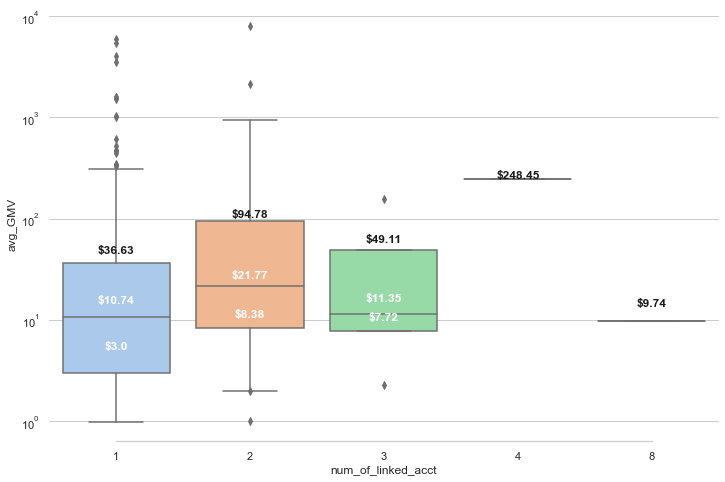

In [158]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 8))
ax.set_yscale("log")
# sns.set(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
box_plot = sns.boxplot(x="num_of_linked_acct", y="avg_GMV",data=df, whis=[5, 95])
# sns.despine(offset=10, trim=True)
ax.yaxis.grid(True)
# ax.set(ylabel="")
sns.despine(trim=True, left=True)

medians = df[['num_of_linked_acct','avg_GMV']].groupby(['num_of_linked_acct'])['avg_GMV'].median().round(2)
medians.reset_index(drop=True,inplace=True)
vertical_offset = df['avg_GMV'].quantile(0.75) * 0.1 # offset from median for display

fst_quantile = df[['num_of_linked_acct','avg_GMV']].groupby(['num_of_linked_acct'])['avg_GMV'].quantile(0.25).round(2)
fst_quantile.reset_index(drop=True,inplace=True)
fst_offset = df['avg_GMV'].quantile(0.65) * 0.1 # offset from median for display

snd_quantile = df[['num_of_linked_acct','avg_GMV']].groupby(['num_of_linked_acct'])['avg_GMV'].quantile(0.75).round(2)
snd_quantile.reset_index(drop=True,inplace=True)
snd_offset = df['avg_GMV'].quantile(0.85) * 0.1 # offset from median for display

for xtick in box_plot.get_xticks()[:3]:
    box_plot.text(xtick, medians[xtick] + vertical_offset, '$'+str(medians[xtick]), 
            horizontalalignment='center',size=12,color='w',weight='semibold')
    box_plot.text(xtick, fst_quantile[xtick] + fst_offset, '$'+str(fst_quantile[xtick]), 
            horizontalalignment='center',size=12,color='w',weight='semibold')
    box_plot.text(xtick, snd_quantile[xtick] + snd_offset, '$'+str(snd_quantile[xtick]), 
            horizontalalignment='center',size=12,color='k',weight='semibold')
for xtick in box_plot.get_xticks()[3:]:
    box_plot.text(xtick, medians[xtick] + vertical_offset, '$'+str(medians[xtick]), 
            horizontalalignment='center',size=12,color='k',weight='semibold')
f.savefig('boxplot.png', dpi=f.dpi)

In [10]:
# import seaborn as sns
# f, ax = plt.subplots(figsize=(7, 6))
# ax.set_yscale("log")
# # sns.set(style="ticks", palette="pastel")
# # Draw a nested boxplot to show bills by day and time
# sns.boxplot(x="num_of_linked_acct", y="avg_GMV",data=df, whis=[5, 95])
# # sns.despine(offset=10, trim=True)
# ax.yaxis.grid(True)
# # ax.set(ylabel="")
# sns.despine(trim=True, left=True)

In [ ]:
## create histogram 
x = df['avg_GMV']
plt.hist(x, bins = )
plt.show()

In [96]:
np.logspace(np.log10(0.1),np.log10(1e4), 100)

array([1.00000000e-01, 1.12332403e-01, 1.26185688e-01, 1.41747416e-01,
       1.59228279e-01, 1.78864953e-01, 2.00923300e-01, 2.25701972e-01,
       2.53536449e-01, 2.84803587e-01, 3.19926714e-01, 3.59381366e-01,
       4.03701726e-01, 4.53487851e-01, 5.09413801e-01, 5.72236766e-01,
       6.42807312e-01, 7.22080902e-01, 8.11130831e-01, 9.11162756e-01,
       1.02353102e+00, 1.14975700e+00, 1.29154967e+00, 1.45082878e+00,
       1.62975083e+00, 1.83073828e+00, 2.05651231e+00, 2.31012970e+00,
       2.59502421e+00, 2.91505306e+00, 3.27454916e+00, 3.67837977e+00,
       4.13201240e+00, 4.64158883e+00, 5.21400829e+00, 5.85702082e+00,
       6.57933225e+00, 7.39072203e+00, 8.30217568e+00, 9.32603347e+00,
       1.04761575e+01, 1.17681195e+01, 1.32194115e+01, 1.48496826e+01,
       1.66810054e+01, 1.87381742e+01, 2.10490414e+01, 2.36448941e+01,
       2.65608778e+01, 2.98364724e+01, 3.35160265e+01, 3.76493581e+01,
       4.22924287e+01, 4.75081016e+01, 5.33669923e+01, 5.99484250e+01,
      

In [34]:
# # df.avg_GMV.hist(log=True,bins=50)
# from matplotlib.ticker import MultipleLocator,AutoMinorLocator,FormatStrFormatter,LogFormatterSciNotation

# class CustomTicker(LogFormatterSciNotation):
#     def __call__(self, x, pos=None):
#         if x not in [0.1,1,10, 100, 1000, 10000]:
#             return LogFormatterSciNotation.__call__(self,x, pos=None)
#         else:
#             return "${x:g}".format(x=x)

# fig, ax = plt.subplots(figsize=(12,8))
# ax.hist(df.avg_GMV, bins=np.logspace(np.log10(1),np.log10(1e4), 50))
# ax.tick_params(axis='x', which='minor', bottom=True)
# ax.set_xscale("log")
# ax.xaxis.set_major_formatter(CustomTicker())

# fst_quantile=df.avg_GMV.quantile(0.25)
# median=df.avg_GMV.median()
# snd_quantile=df.avg_GMV.quantile(0.75)

# xcoords = [fst_quantile, median, snd_quantile]
# # colors for the lines
# colors = ['green','red','navy']

# for xc,c in zip(xcoords,colors):
#     plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
    
# ax.set_ylabel('Count')
# ax.set_xlabel('avg GMV')

# ax.annotate('25 percentile \n $%s' %fst_quantile,
#             xy=(fst_quantile, 25),
#             xytext=(fst_quantile, 30),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='center', verticalalignment='top')
# ax.annotate('median \n $%s' %median,
#             xy=(median, 25),
#             xytext=(median, 30),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='center', verticalalignment='top')
# ax.annotate('75 percentile \n $%s' %snd_quantile,
#             xy=(snd_quantile, 25),
#             xytext=(snd_quantile, 30),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='center', verticalalignment='top')

# plt.savefig('histogram.png', dpi=fig.dpi)
# plt.show()

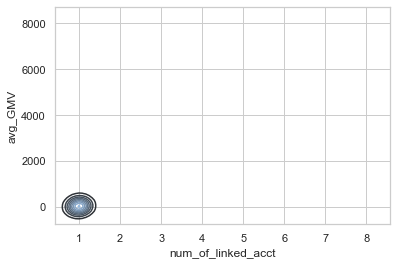

In [157]:
# sns.kdeplot(df.num_of_linked_acct, df.avg_GMV)

## creating graph using df2 - Sum GMV 

In [7]:
df2= pd.read_csv(cwd+'/3_Sum_GMV.csv')
df2.reset_index(drop=True, inplace=True)

In [8]:
df2


,seller_id,num_of_linked_acct,sum_GMV
0,1022163208,1,17.93
1,1212529021,1,605.00
2,1649682578,1,1508.35
3,1002770484,1,14.99
4,201475297,1,31.75
...,...,...,...
364,1005539204,1,18.04
365,772254,1,10.00
366,758308309,1,9.99
367,594947,1,1.00


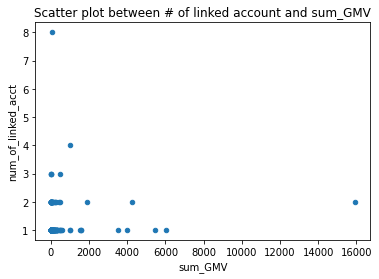

In [9]:
## create scatter plot 
fig = df2.plot.scatter(x='sum_GMV', y='num_of_linked_acct', logx=False ,title= "Scatter plot between # of linked account and sum_GMV").get_figure();
fig.savefig('scatter2.png',dpi=fig.dpi)


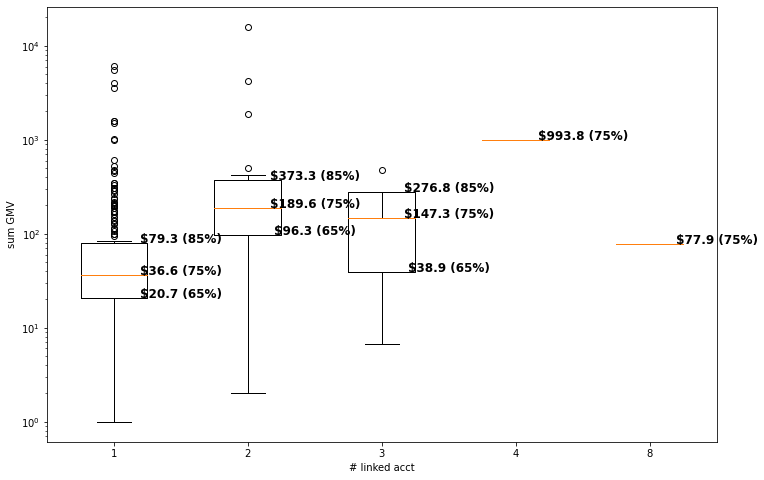

In [36]:
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data to visualise
stats={}
for k in df2.num_of_linked_acct.unique():
    data=df2.loc[df2.num_of_linked_acct==k]['sum_GMV']
    stats[k] = cbook.boxplot_stats(data, labels=str(k))[0]
    stats[k]['q1'], stats[k]['med'], stats[k]['q3'] = np.percentile(data, [65, 75, 85])

# stats = {}
# # Compute the boxplot stats (as in the default matplotlib implementation)
# stats['A'] = cbook.boxplot_stats(data, labels='A')[0]
# stats['B'] = cbook.boxplot_stats(data, labels='B')[0]
# stats['C'] = cbook.boxplot_stats(data, labels='C')[0]

# # For box A compute the 1st and 99th percentiles
# stats['A']['q1'], stats['A']['q3'] = np.percentile(data, [1, 99])
# # For box B compute the 10th and 90th percentiles
# stats['B']['q1'], stats['B']['q3'] = np.percentile(data, [10, 90])
# # For box C compute the 25th and 75th percentiles (matplotlib default)
# stats['C']['q1'], stats['C']['q3'] = np.percentile(data, [25, 75])

fig, ax = plt.subplots(figsize=(12,8))
ax.set_yscale("log")
# Plot boxplots from our computed statistics

medians = df2[['num_of_linked_acct','sum_GMV']].groupby(['num_of_linked_acct'])['sum_GMV'].quantile(0.75).round(1)
medians.reset_index(drop=True,inplace=True)
vertical_offset = df['avg_GMV'].quantile(0.75) * 0.01 # offset from median for display

fst_quantile = df2[['num_of_linked_acct','sum_GMV']].groupby(['num_of_linked_acct'])['sum_GMV'].quantile(0.65).round(1)
fst_quantile.reset_index(drop=True,inplace=True)
fst_offset = df2['sum_GMV'].quantile(0.65) * 0.01 # offset from median for display

snd_quantile = df2[['num_of_linked_acct','sum_GMV']].groupby(['num_of_linked_acct'])['sum_GMV'].quantile(0.85).round(1)
snd_quantile.reset_index(drop=True,inplace=True)
snd_offset = df2['sum_GMV'].quantile(0.85) * 0.01 # offset from median for display

ax.bxp([stats[i] for i in np.sort(list(stats.keys()))], positions=range(len(stats.keys())))

shift=0.5
size=12

for xtick in ax.get_xticks()[:3]:
    ax.text(xtick+shift, medians[xtick] + vertical_offset, '$'+str(medians[xtick])+ str(' (75%)'), 
            horizontalalignment='center',size=size,color='k',weight='semibold')
    ax.text(xtick+shift, fst_quantile[xtick] + fst_offset, '$'+str(fst_quantile[xtick])+ str(' (65%)'), 
            horizontalalignment='center',size=size,color='k',weight='semibold')
    ax.text(xtick+shift, snd_quantile[xtick] + snd_offset, '$'+str(snd_quantile[xtick])+ str(' (85%)'), 
            horizontalalignment='center',size=size,color='k',weight='semibold')
for xtick in ax.get_xticks()[3:]:
    ax.text(xtick+shift, medians[xtick] + vertical_offset, '$'+str(medians[xtick])+ str(' (75%)'), 
            horizontalalignment='center',size=size,color='k',weight='semibold')
    
ax.set_ylabel('sum GMV')   
ax.set_xlabel('# linked acct')  
fig.savefig('boxplot2.png', dpi=fig.dpi)


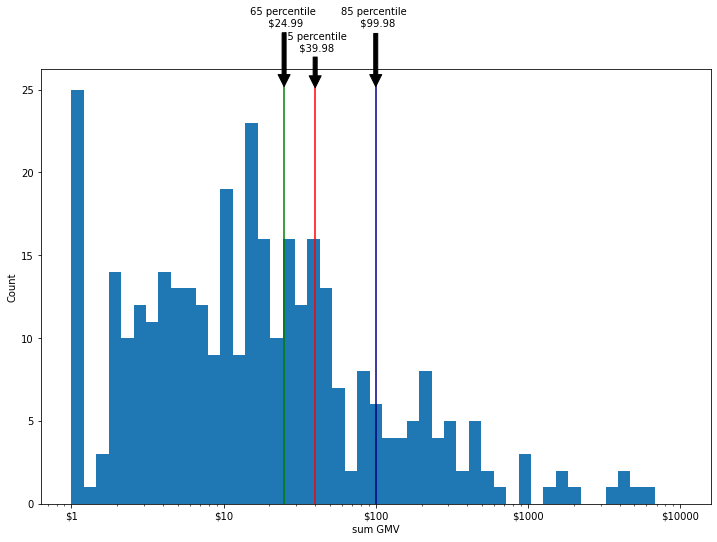

In [41]:
# df.avg_GMV.hist(log=True,bins=50)
from matplotlib.ticker import MultipleLocator,AutoMinorLocator,FormatStrFormatter,LogFormatterSciNotation

class CustomTicker(LogFormatterSciNotation):
    def __call__(self, x, pos=None):
        if x not in [0.1,1,10, 100, 1000, 10000]:
            return LogFormatterSciNotation.__call__(self,x, pos=None)
        else:
            return "${x:g}".format(x=x)

fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df2.sum_GMV, bins=np.logspace(np.log10(1),np.log10(1e4), 50))
ax.tick_params(axis='x', which='minor', bottom=True)
ax.set_xscale("log")
ax.xaxis.set_major_formatter(CustomTicker())

fst_quantile=df2.sum_GMV.quantile(0.65).round(2)
median=df2.sum_GMV.quantile(0.75).round(2)
snd_quantile=df2.sum_GMV.quantile(0.85).round(2)

xcoords = [fst_quantile, median, snd_quantile]
# colors for the lines
colors = ['green','red','navy']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
    
ax.set_ylabel('Count')
ax.set_xlabel('sum GMV')

ax.annotate('65 percentile \n $%s' %fst_quantile,
            xy=(fst_quantile, 25),
            xytext=(fst_quantile, 30),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
ax.annotate('75 percentile \n $%s' %median,
            xy=(median, 25),
            xytext=(median, 28.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
ax.annotate('85 percentile \n $%s' %snd_quantile,
            xy=(snd_quantile, 25),
            xytext=(snd_quantile, 30),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.savefig('histogram2.png', dpi=fig.dpi)
plt.show()

In [40]:
# xcoords = [fst_quantile, median, snd_quantile]
snd_quantile

100.0

In [43]:
df0_65=df2[df2['sum_GMV'] <= fst_quantile]
df0_65.shape
df65_75=df2[(df2['sum_GMV'] <= median)&(df2['sum_GMV']>fst_quantile)]
df65_75.shape
df75_85=df2[(df2['sum_GMV'] <= snd_quantile)&(df2['sum_GMV']>median)]
df75_85.shape

(36, 3)

In [44]:
writer = pd.ExcelWriter('Population_sumGMV.xlsx', engine='xlsxwriter')
df0_65.to_excel(writer,sheet_name='User0-65Percentile',index=False)
df65_75.to_excel(writer,sheet_name='User65-75Percentile',index=False)
df75_85.to_excel(writer,sheet_name='User75-85Percentile',index=False)
writer.save()